                                                NLP Processing                                                                

In [23]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Reading data

In [48]:
# reading data (csv) from destination source to process the nlp logic.
inp_file = r'D:\NikhilData\Desktop\Webpages\Python Practice\Customer Review Insights Project\Project\data\Processed_Dataset.csv'
df = pd.read_csv(inp_file)
df.shape

(5, 6)

    Sentiment Analysis of Flipkart Reviews

Analyze the sentiments of Flipkart reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [25]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
data = df[["Review", "Positive", "Negative", "Neutral"]]
print(data.head(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NikhilM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


               Review  Positive  Negative  Neutral
0               super     1.000     0.000    0.000
1             awesome     1.000     0.000    0.000
2                fair     1.000     0.000    0.000
3     useless product     0.000     0.737    0.263
4                fair     1.000     0.000    0.000
5             awesome     1.000     0.000    0.000
6  highly recommended     0.677     0.000    0.323
7                nice     1.000     0.000    0.000
8      unsatisfactory     0.000     0.000    1.000
9     worth the money     0.487     0.000    0.513


Now let’s see how most of the reviewers think about the products and services of Flipkart:

In [26]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])

print('Positive : ',x)
print('Negative : ',y)
print('Neutral : ', z)

Positive :  109579.66599997114
Negative :  11157.038000000293
Neutral :  59639.3050000152


In [46]:
def sentiment_score(a,b,c):
    if (a > b) and (a > c):
        print(' Most of People Gave Positive 😊 Response.')
    elif (b < a) and (b < c):
        print(' Most of People Gave Negative 😠 Response.')
    else:
        print(' Most of People Gave Neutral 🙂 Response.')

sentiment_score(x,y,z)

 Most of People Gave Positive 😊 Response.


------------------------------------------------------------------------------------------------------------------------------
# Visualization

    WORD CLOUD
Using the word cloud we'll generate picture to understand what kind of reviews people leave. 

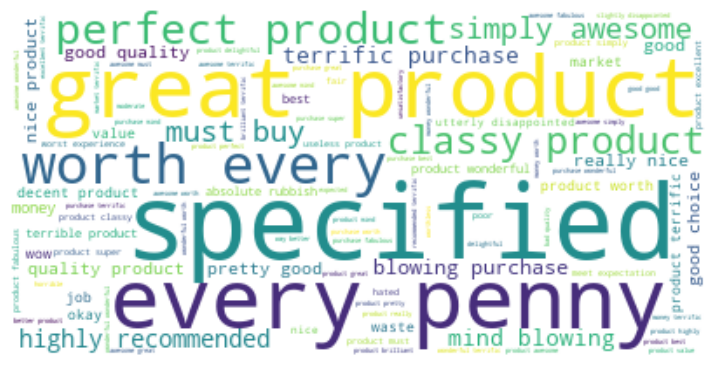

In [28]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(9,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

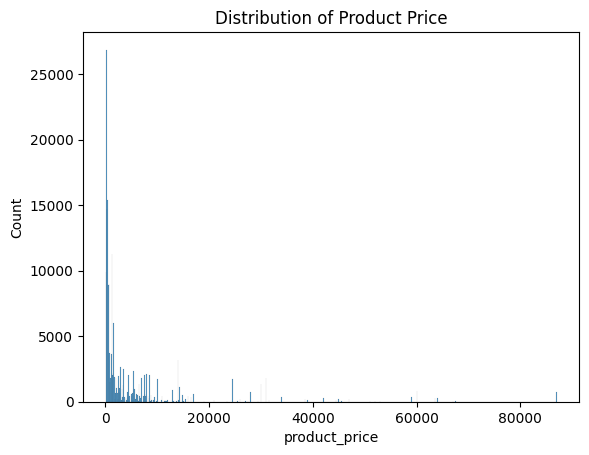

In [ ]:
sns.histplot(df['product_price'])
plt.title('Distribution of Product Price')
plt.show()

C:\Users\NikhilM\AppData\Local\Temp\ipykernel_11988\3061669101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment',palette=colors)


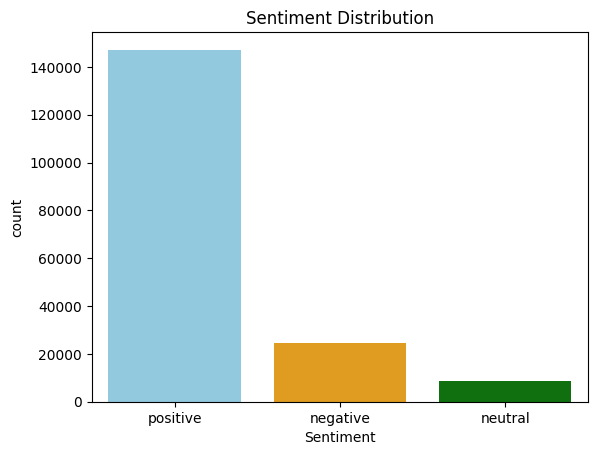

In [44]:
colors = ['skyblue', 'orange', 'green']
sns.countplot(data=df, x='Sentiment',palette=colors)
plt.title('Sentiment Distribution')
plt.show()

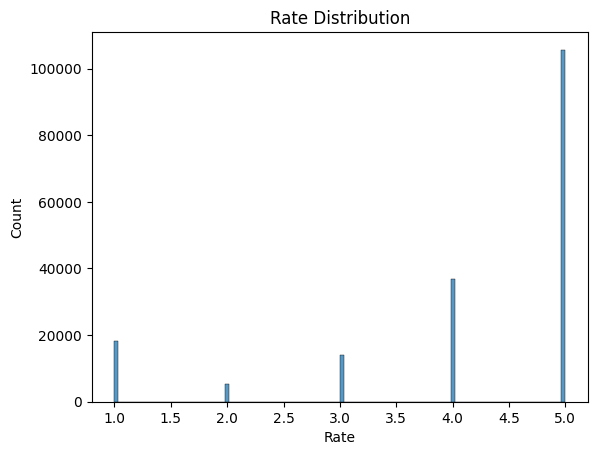

In [45]:
sns.histplot(df['Rate'])
plt.title('Rate Distribution')
plt.show()

# Conclusion
So, most people give Positive reviews with almost high ratings, and a small proportion of people give Neutral reviews. So we can say that people are satisfied with Flipkart products and services.